### Plot _thornado_ data

Notebook for quick plotting of 1D _thornado_ data. 

---

To Do:  

* Make it easier to select what to plot. Currently: Very Manual 
* Want easier use for data from multiple runs

In [1]:
import h5py    
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib ipympl

In [2]:
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['legend.handlelength']=4
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['ytick.minor.visible']=True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.labelsize']   = 14
mpl.rcParams['ytick.labelsize']   = 14

Data Directory. Simply change `simName` to the desired simulation. Later will likely have to modify.

In [3]:
sims = ["100_B1.0_C0.0_3"]
fields = [ 'uAF_P', 'uPF_V1', 'uPF_V2', 'uCF_D' ]
simName = "Sod"
simType = "nuclear" #Currently: "ideal" or "nuclear"
sim_y  = "2D_line/x_r"
sim_x  = "2D_line/y_t"

dataDir_y = "../../data/" + simName + "/" + simType + "/" + sim_y
dataDir_x = "../../data/" + simName + "/" + simType + "/" + sim_x

Setup figure directory

In [4]:
figDir = "../figures/"

For now, manually specify the `fileNumber`. Possibly add in ways to automatically get the max.

In [5]:
fileNumber = "000201"
#fileName = dataDir + '/' + simName + '_FluidFields_' + fileNumber + '.h5' 
fileName_y = dataDir_y + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' 
fileName_x = dataDir_x + '/' + 'RiemannProblem' + '_FluidFields_' + fileNumber + '.h5' 

mb = 1.660539 * pow(10,-24)

Read the Data

In [11]:
with h5py.File(fileName_y, 'r') as f:
    for key in f.keys():
        print(key)
    
    time = f['Time'][:]

    x1_y = f['/Spatial Grid/X1'][:]
    x2_y = f['/Spatial Grid/X2'][:]
    
    uAF_P_y  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye_y = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]
    
    uPF_V1_y = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    uPF_V2_y = f['/Fluid Fields/Primitive/Three-Velocity (2)' ][:]
    
    uCF_D_y = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_y = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]
    
    print("Time:", float(time), "ms")
    
with h5py.File(fileName_x, 'r') as f:
    for key in f.keys():
        print(key)

    time = f['Time'][:]

    x1_x = f['/Spatial Grid/X1'][:]
    x2_x = f['/Spatial Grid/X2'][:]

    uAF_P_x  = f['/Fluid Fields/Auxiliary/Pressure'][:]
    uAF_Ye_x = f['/Fluid Fields/Auxiliary/Electron Fraction'][:]

    uPF_V1_x = f['/Fluid Fields/Primitive/Three-Velocity (1)' ][:]
    uPF_V2_x = f['/Fluid Fields/Primitive/Three-Velocity (2)' ][:]

    uCF_D_x = f['/Fluid Fields/Conserved/Conserved Baryon Density'][:]
    uCF_Ne_x = f['/Fluid Fields/Conserved/Conserved Electron Density'][:]

    print("Time:", float(time), "ms")          

Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.005000000000000017 ms
Fluid Fields
Shock Detector
Spatial Grid
Time
Time: 0.005000000000000017 ms


Read the desired fields into a python dictionary.

In [12]:
data_y = {}

# print(time)
for a in range(len(fields)):
    data_y[fields[a]]=np.zeros( (len(x1_y), len(x2_y)) )
data_y['x1'] = x1_y
data_y['x2'] = x2_y
data_y['uCF_D'] = uCF_D_y[0][:][:]
data_y['uPF_V1'] = uPF_V1_y[0][:][:]
data_y['uPF_V2'] = uPF_V2_y[0][:][:]
data_y['uAF_P'] = uAF_P_y[0][:][:]

data_x = {}

# print(time)
for a in range(len(fields)):
    data_x[fields[a]]=np.zeros( (len(x1_x), len(x2_x)) )
data_x['x1'] = x1_x
data_x['x2'] = x2_x
data_x['uCF_D'] = uCF_D_x[0][:][:]
data_x['uPF_V1'] = uPF_V1_x[0][:][:]
data_x['uPF_V2'] = uPF_V2_x[0][:][:]
data_x['uAF_P'] = uAF_P_x[0][:][:]

Plot! Compare to 'Analytic'

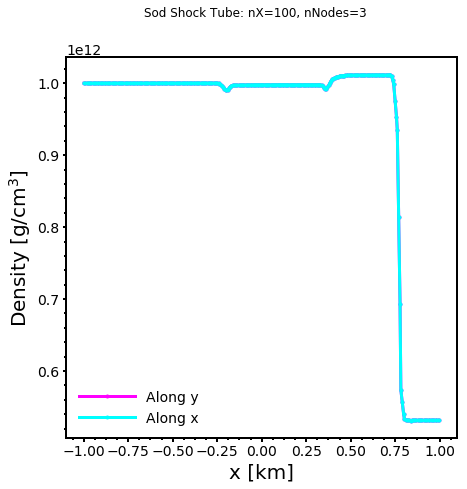

In [13]:
fig, cax = plt.subplots(1, sharex=True,figsize=(7,7))

# cax.plot(data_avg['x2'],data_avg['uCF_D'], marker='.',label="Characteristic Limiting", color = "blue")
cax.plot(data_y['x2'],data_y['uCF_D'][:,0], marker='.',label="Along y", color = "magenta")
cax.plot(data_x['x1'],data_x['uCF_D'][0,:], marker='.',label="Along x", color = "cyan")

cax.legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax.set(xlabel="x [km]",ylabel = r'Density [g/cm$^3$]')
# cax.set_xlim([-1,1])

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

Plot! Ye

In [14]:
# Error in x wrt y
error_y = {}
error_x = {}
for j in range(len(fields)):
    error_y[fields[j]] = np.zeros(len(x2_y))
    error_x[fields[j]] = np.zeros(len(x1_x))
    for i in range(len(x2_y)):
        error_y[fields[j]][i] = (1/300.0) * abs(( data_x[fields[j]][0,i] - data_y[fields[j]][i,0] ) / data_y[fields[j]][i,0])
    for i in range(len(x1_x)):
        error_x[fields[j]][i] = (1/300.0) * abs(( data_x[fields[j]][0,i] - data_y[fields[j]][i,0] ) / data_x[fields[j]][0,i])    
    


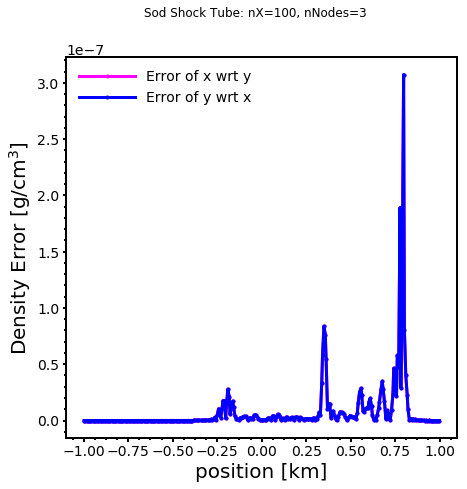

In [15]:
fig, cax = plt.subplots(1, sharex=True,figsize=(7,7))

# cax.plot(data_avg['x2'],data_avg['uCF_D'], marker='.',label="Characteristic Limiting", color = "blue")
cax.plot(data_y['x2'],error_y['uCF_D'], marker='.',label="Error of x wrt y", color = "magenta")
cax.plot(data_x['x1'],error_x['uCF_D'], marker='.',label="Error of y wrt x", color = "blue")

cax.legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax.set(xlabel="position [km]",ylabel = r'Density Error [g/cm$^3$]')
# cax.set_xlim([-1,1])

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

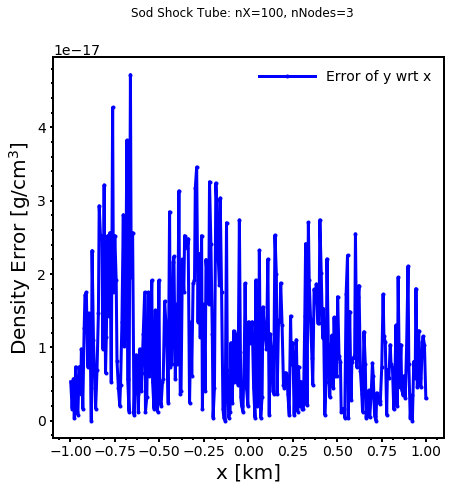

In [62]:
fig, cax = plt.subplots(1, sharex=True,figsize=(7,7))

# cax.plot(data_avg['x2'],data_avg['uCF_D'], marker='.',label="Characteristic Limiting", color = "blue")
cax.plot(data_x['x1'],error_x['uCF_D'], marker='.',label="Error of y wrt x", color = "blue")

cax.legend()
fig.suptitle("Sod Shock Tube: nX=100, nNodes=3")
# for ax in cax.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

cax.set(xlabel="x [km]",ylabel = r'Density Error [g/cm$^3$]')
# cax.set_xlim([-1,1])

#plt.savefig(figDir+"sod_nuclear_char_t.png", dpi=300, format="png")

plt.show()

In [43]:
np.min(data_y['uCF_D'][:,0])

984541095800.8115